In [1]:
import xgboost as xgb
import numpy as np
from numpy import sort
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.pyplot as plt
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.
F:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
def read_data():
    path = 'F:/bisai'
    train = pd.read_csv(path+'/train.csv', header=0, parse_dates=['date'])
    train_target = pd.read_csv(path+'/train_label.csv', header=0)
    test = pd.read_csv(path+'/test.csv', header=0, parse_dates=['date'])
    train_df = pd.merge(train, train_target)

    
    return train_df, test

In [3]:
def structural_feature(train, test):    
    test['label'] = -1
    data = pd.concat([train, test], axis=0)

    
    '''特征工程 >>>>>'''   
    
#     data['year'] = data['date'].dt.year
#     data['month'] = data['date'].dt.month
#     data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour

#     data['D1+D2'] = data['D1'] + data['D2']
#     data['D1-D2'] = data['D1'] - data['D2']
#     data['D1/D2'] = data['D1'] / data['D2']
#     data['D2/D1'] = data['D2'] / data['D1']
#     data['D1*D2'] = data['D1'] * data['D2']
#     data['D1_square'] = data['D1'] ** 2
#     data['D2_square'] = data['D2'] ** 2
    
    data['A_square'] = data['A1'] ** 2 + data['A2'] ** 2 + data['A3'] ** 2
    data['B_square'] = data['B1'] ** 2 + data['B2'] ** 2 + data['B3'] ** 2
#     data['C_square'] = data['C1'] ** 2 + data['C2'] ** 2 + data['C3'] ** 2
         
    data['A_cross'] = data['A1'] * data['A2'] + data['A2'] * data['A3'] + data['A1'] * data['A3']
    data['B_cross'] = data['B1'] * data['B2'] + data['B2'] * data['B3'] + data['B1'] * data['B3']
#     data['C_cross'] = data['C1'] * data['C2'] + data['C2'] * data['C3'] + data['C1'] * data['C3']

    data['A_square'] = data['A1'] ** 2 + data['A2'] ** 2 + data['A3'] ** 2
    data['B_square'] = data['B1'] ** 2 + data['B2'] ** 2 + data['B3'] ** 2
#     data['C_square'] = data['C1'] ** 2 + data['C2'] ** 2 + data['C3'] ** 2
        
    data['A_*'] = data['A1'] * data['A2'] * data['A3']
    data['B_*'] = data['B1'] * data['B2'] * data['B3']
#     data['C_*'] = data['C1'] * data['C2'] * data['C3']

    data['A_+'] = data['A1'] + data['A2'] + data['A3']
    data['B_+'] = data['B1'] + data['B2'] + data['B3']
#     data['C_+'] = data['C1'] + data['C2'] + data['C3']

    data['C_ratio'] = data['C1'] * data['C3'] / data['C2']
    data['A_ratio'] = data['A2'] * data['A3'] / data['A1']
    
    data['1_*'] = data['A1'] * data['B1'] * data['C1'] * data['D1']
    data['2_*'] = data['A2'] * data['B2'] * data['C2'] * data['D2']
    
    data['1'] = data['A1'] ** 2 + data['B1'] ** 2 + data['C1'] ** 2
    data['2'] = data['A2'] ** 2 + data['B2'] ** 2 + data['C2'] ** 2    

    data['ABCD1_cross'] = data['A1'] * data['B1'] + data['A1'] * data['C1'] + data['A1'] * data['D1']
    data['ABCD3_cross'] = data['A3'] * data['B3'] + data['A3'] * data['C3']
    
#     data['E_2-3_ratio'] = data['E2'] / data['E3']
    data['E_14-1_ratio'] = data['E14'] / data['E1'] 
    
    data['A1_B1'] = data['A1'] ** 3 + data['B1'] ** 3 
    data['A2_B2'] = data['A2'] ** 3 + data['B2'] ** 3
    data['A3_B3'] = data['A3'] ** 3 + data['B3'] ** 3
    data['B1_C1'] = data['B1'] ** 3 + data['C1'] ** 3
    data['B2_C1'] = data['B2'] ** 3 + data['C1'] ** 3 
    data['B3_C2'] = data['B3'] ** 3 + data['C2'] ** 3 
    data['B1_C2'] = data['B1'] ** 3 + data['C2'] ** 3 
    data['B1_B3'] = data['B1'] ** 3 + data['B3'] ** 3 
    data['E7_10'] = data['E7'] ** 3 + data['E10'] ** 3
    data['E10_23'] = data['E10'] ** 3 + data['E23'] ** 3
    

    
   
    normalization_columns = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 
                             'C2', 'C3','E2', 'E3', 'E7', 'E10', 'E17']
    
    for column in normalization_columns:
        data[column] = (data[column] - data[column].min(axis = 0)) / (data[column].max(axis = 0) - data[column].min(axis = 0))

    '''特征工程结束 <<<<'''

   
    del data['date'], data['E2'], data['E3'], data['E5'], data['E8'], data['E9'], data['E11'], data['E12'], data['E13']
    del data['E15'], data['E16'], data['E17'], data['E18'], data['E19'], data['E21'], data['E22'], data['E24'], data['E25']
    del data['E26'], data['E28'], data['E29']

    train = data[data.label != -1]
    test = data[data.label == -1]
    
    del test['label']

    '''调整特征顺序'''
    l = train['label']
    del train['label']
    train['label'] = l
    

    
    return train, test

In [33]:
def build_model(x_train, y_train):
    model = lgb.LGBMRegressor(
        # num_leaves=25,
        max_depth=8,
        learning_rate=0.07,
        # n_estimators=5000,
        objective='binary',
        # min_split_gain=0,
        # min_child_weight=5,
        # min_data_in_leaf=5,
        # max_bin=200,
        # subsample=0.8,
        # subsample_freq=1,
        # colsample_bytree=0.8,
        # seed=1000,
        # n_jobs=-1,
        # # silent=True,
        # lambda_l1=0.1,
        # lambda_l2=0.8
    )

    model.fit(x_train, y_train)
    return model

In [4]:
def show_auc(model, x, y, is_train=True):
    y_pred = model.predict(x)
    score = roc_auc_score(y, y_pred)
    if is_train:
        print('正常值模型 训练集roc_auc_score：{}'.format(score))
    else:
        print('正常值模型 测试集roc_auc_score：{}'.format(score))
    return score

def averagenum(num):
    nsum = 0
    for i in range(len(num)):
        nsum += num[i]
    return nsum / len(num)

def main():
    params = {
              'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread':4,
              'learning_rate':0.1
              }
    train, test = read_data()
    train, test = structural_feature(train, test)
    f_num = len(train.columns) - 1
    del_feature = ['ID', 'label']

    features = [i for i in train.columns if i not in del_feature]

    train_x = train[features]
    train_y = train['label'].values
    test = test[features]
    
    folds = KFold(n_splits=5, shuffle=False, random_state=98)
    prob_oof = np.zeros((train_x.shape[0],))
    test_pred_prob = np.zeros((test.shape[0],))
    feature_importance_df = pd.DataFrame()
    liso=[]
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train)):
        #print("fold {}".format(fold_ + 1))
        trn_data = lgb.Dataset(train_x.iloc[trn_idx], label=train_y[trn_idx])
        val_data = lgb.Dataset(train_x.iloc[val_idx], label=train_y[val_idx])
    
        clf = lgb.train(params,
                        trn_data,
                        10000,
                        valid_sets=[trn_data, val_data],
                        early_stopping_rounds=1000,verbose_eval=0)
        
        prob_oof[val_idx] = clf.predict(train_x.iloc[val_idx], num_iteration=clf.best_iteration)
        aaap=roc_auc_score(train_y[val_idx], prob_oof[val_idx])
        liso.append(aaap)
        
        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = features
        fold_importance_df["importance"] = clf.feature_importance()
        fold_importance_df["fold"] = fold_ + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        test_pred_prob += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

    print('auc:{}'.format(averagenum(liso)))
    return test_pred_prob

In [73]:
train, test = read_data()
print("特征工程前：训练集：shape:{0}  测试集：shape：{1}".format(train.shape, test.shape))
train, test = structural_feature(train, test)


特征工程前：训练集：shape:(60000, 43)  测试集：shape：(40000, 42)


In [5]:
import time

start = time.time()
main()
end=time.time()
print(end-start)

auc:0.7154420953162799
43.44983649253845


In [141]:
lgb_params5= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              }
a = [lgb_params0,lgb_params1,lgb_params3,lgb_params4]
ab =[]
for i in a:
    ab.append(main(i))

auc:0.7163561961761155
auc:0.7183472982480958
auc:0.7162660340973246
auc:0.7172226379655738


In [150]:
aaaa = main(lgb_params1)

auc:0.7183472982480958


In [142]:
ae=[]
for i in range(len(ab[0])):
    ae.append((ab[0][i]*4/20)+(ab[1][i]*7/20)+(ab[2][i]*3/20)+(ab[3][i]*6/20))

In [143]:
ab[4]

IndexError: list index out of range

In [144]:
ae

[0.11766879224049226,
 0.10744138452216014,
 0.24260049158848662,
 0.30406287590532477,
 0.2473866882522493,
 0.15041381789528496,
 0.18279318780700538,
 0.16952069158855584,
 0.4696970062491404,
 0.22818589270515824,
 0.06623966385705253,
 0.12326089097786729,
 0.237491969847401,
 0.24559451737306034,
 0.060747391560376715,
 0.24286314941373033,
 0.09234419613455437,
 0.08489357475284365,
 0.42937954127472666,
 0.2235816247020665,
 0.11870112354625348,
 0.2047605020656981,
 0.3199984738576653,
 0.07364978071907965,
 0.3029918204624873,
 0.27764005819761195,
 0.1243427584792872,
 0.397108697542533,
 0.05632252069906345,
 0.10766558326227607,
 0.05427513585323815,
 0.21734992234134487,
 0.16904281462499798,
 0.11053196754118119,
 0.07047062427964337,
 0.07422485039400764,
 0.11615931824829415,
 0.22121321026303242,
 0.42010068328062505,
 0.13668337814223025,
 0.09057469501230356,
 0.2306374785014178,
 0.03266972832530451,
 0.3471774347729736,
 0.16325597430381664,
 0.22249633317329645,


In [ ]:
0.7252343944025303

In [6]:
def pp(lgb_train,lgb_eval):
    params = {
              'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread':4,
              'learning_rate':0.1
              }

    ### 交叉验证(调参)
    print('交叉验证')
    max_auc = float('0')
    best_params = {}

    # 准确率
    print("调参1：提高准确率")
    for num_leaves in range(5,100,5):
        for max_depth in range(3,8,1):
            params['num_leaves'] = num_leaves
            params['max_depth'] = max_depth

            cv_results = lgb.cv(
                                params,
                                lgb_train,
                                seed=1,
                                nfold=5,
                                metrics=['auc'],
                                early_stopping_rounds=10,
                                verbose_eval=False
                                )

            mean_auc = pd.Series(cv_results['auc-mean']).max()
            boost_rounds = pd.Series(cv_results['auc-mean']).idxmax()

            if mean_auc >= max_auc:
                max_auc = mean_auc
                best_params['num_leaves'] = num_leaves
                best_params['max_depth'] = max_depth
    if 'num_leaves' and 'max_depth' in best_params.keys():          
        params['num_leaves'] = best_params['num_leaves']
        params['max_depth'] = best_params['max_depth']

    # 过拟合 
    print("调参2：降低过拟合")
    for max_bin in range(5,256,10):
        for min_data_in_leaf in range(1,102,10):
                params['max_bin'] = max_bin
                params['min_data_in_leaf'] = min_data_in_leaf

                cv_results = lgb.cv(
                                    params,
                                    lgb_train,
                                    seed=1,
                                    nfold=5,
                                    metrics=['auc'],
                                    early_stopping_rounds=10,
                                    verbose_eval=False
                                    )

                mean_auc = pd.Series(cv_results['auc-mean']).max()
                boost_rounds = pd.Series(cv_results['auc-mean']).idxmax()

                if mean_auc >= max_auc:
                    max_auc = mean_auc
                    best_params['max_bin']= max_bin
                    best_params['min_data_in_leaf'] = min_data_in_leaf
    if 'max_bin' and 'min_data_in_leaf' in best_params.keys():
        params['min_data_in_leaf'] = best_params['min_data_in_leaf']
        params['max_bin'] = best_params['max_bin']

    print("调参3：降低过拟合")
    for feature_fraction in [0.6,0.7,0.8,0.9,1.0]:
        for bagging_fraction in [0.6,0.7,0.8,0.9,1.0]:
            for bagging_freq in range(0,50,5):
                params['feature_fraction'] = feature_fraction
                params['bagging_fraction'] = bagging_fraction
                params['bagging_freq'] = bagging_freq

                cv_results = lgb.cv(
                                    params,
                                    lgb_train,
                                    seed=1,
                                    nfold=5,
                                    metrics=['auc'],
                                    early_stopping_rounds=10,
                                    verbose_eval=False
                                    )

                mean_auc = pd.Series(cv_results['auc-mean']).max()
                boost_rounds = pd.Series(cv_results['auc-mean']).idxmax()

                if mean_auc >= max_auc:
                    max_auc=mean_auc
                    best_params['feature_fraction'] = feature_fraction
                    best_params['bagging_fraction'] = bagging_fraction
                    best_params['bagging_freq'] = bagging_freq

    if 'feature_fraction' and 'bagging_fraction' and 'bagging_freq' in best_params.keys():
        params['feature_fraction'] = best_params['feature_fraction']
        params['bagging_fraction'] = best_params['bagging_fraction']
        params['bagging_freq'] = best_params['bagging_freq']


    print("调参4：降低过拟合")
    for lambda_l1 in [1e-5,1e-3,1e-1,0.0,0.1,0.3,0.5,0.7,0.9,1.0]:
        for lambda_l2 in [1e-5,1e-3,1e-1,0.0,0.1,0.4,0.6,0.7,0.9,1.0]:
            params['lambda_l1'] = lambda_l1
            params['lambda_l2'] = lambda_l2
            cv_results = lgb.cv(
                                params,
                                lgb_train,
                                seed=1,
                                nfold=5,
                                metrics=['auc'],
                                early_stopping_rounds=10,
                                verbose_eval=False
                                )

            mean_auc = pd.Series(cv_results['auc-mean']).max()
            boost_rounds = pd.Series(cv_results['auc-mean']).idxmax()

            if mean_auc >= max_auc:
                max_auc=mean_auc
                best_params['lambda_l1'] = lambda_l1
                best_params['lambda_l2'] = lambda_l2
    if 'lambda_l1' and 'lambda_l2' in best_params.keys():
        params['lambda_l1'] = best_params['lambda_l1']
        params['lambda_l2'] = best_params['lambda_l2']

    print("调参5：降低过拟合2")
    for min_split_gain in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
        params['min_split_gain'] = min_split_gain

        cv_results = lgb.cv(
                            params,
                            lgb_train,
                            seed=1,
                            nfold=5,
                            metrics=['auc'],
                            early_stopping_rounds=10,
                            verbose_eval=False
                            )

        mean_auc = pd.Series(cv_results['auc-mean']).max()
        boost_rounds = pd.Series(cv_results['auc-mean']).idxmax()

        if mean_auc >= max_auc:
            max_auc=mean_auc

            best_params['min_split_gain'] = min_split_gain
    if 'min_split_gain' in best_params.keys():
        params['min_split_gain'] = best_params['min_split_gain']
    print(params)


In [13]:
from sklearn import datasets,ensemble,naive_bayes
class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                y_holdout = y[test_idx]
                print ("Fit Model %d fold %d" % (i, j))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]                

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]
            S_test[:, i] = S_test_i.mean(axis=1)

        # results = cross_val_score(self.stacker, S_train, y, cv=5, scoring='r2')
        # print("Stacker score: %.4f (%.4f)" % (results.mean(), results.std()))
        # exit()

        self.stacker.fit(S_train, y)
        res = self.stacker.predict(S_test)[:]
        return res

# rf params
lgb_params0= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc', 'nthread': 4, 
              'learning_rate': 0.1, 
              'num_leaves': 15,
              'max_depth': 6,
              'max_bin': 255,
              'min_data_in_leaf': 71, 
              'feature_fraction': 0.6, 
              'bagging_fraction': 0.8, 
              'bagging_freq': 5, 
              'lambda_l1': 0.1, 
              'lambda_l2': 0.0, 
              'min_split_gain': 0.0}


# lgb params
lgb_params1 = {'boosting_type': 'gbdt',
               'objective': 'binary',
               'metric': 'auc',
               'nthread': 4, 
               'learning_rate': 0.1,
               'num_leaves': 45, 
               'max_depth': 7,
               'max_bin': 255, 
               'min_data_in_leaf': 101,
               'feature_fraction': 0.6,
               'bagging_fraction': 1.0, 
               'bagging_freq': 45, 
               'lambda_l1': 0.5, 
               'lambda_l2': 0.4,
               'min_split_gain': 0.0}


# lgb params
lgb_params2= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4,
              'learning_rate': 0.1,
              'num_leaves': 40, 
              'max_depth': 7,
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 1.0, 
              'bagging_fraction': 1.0,
              'bagging_freq': 45, 
              'lambda_l1': 1.0, 
              'lambda_l2': 1.0, 
              'min_split_gain': 1.0}

lgb_params3= {'boosting_type': 'gbdt', 
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4, 
              'learning_rate': 0.1,
              'num_leaves': 35,
              'max_depth': 6, 
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 0.7,
              'bagging_fraction': 0.9,
              'bagging_freq': 25, 
              'lambda_l1': 1e-05,
              'lambda_l2': 0.001,
              'min_split_gain': 0.0}

lgb_params4= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4,
              'learning_rate': 0.1,
              'num_leaves': 45, 
              'max_depth': 7,
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 0.6,
              'bagging_fraction': 0.9, 
              'bagging_freq': 35, 
              'lambda_l1': 1e-05,
              'lambda_l2': 0.001, 
              'min_split_gain': 0.0}


lgb_params5= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              }



# lgb model
lgb_model0 = lgb.LGBMRegressor(**lgb_params0)
lgb_model1 = lgb.LGBMRegressor(**lgb_params1)
lgb_model2 = lgb.LGBMRegressor(**lgb_params2)
lgb_model3 = lgb.LGBMRegressor(**lgb_params3)
lgb_model4 = lgb.LGBMRegressor(**lgb_params4)

train, test = read_data()
train, test = structural_feature(train, test)
f_num = len(train.columns) - 1
del_feature = ['ID', 'label']

features = [i for i in train.columns if i not in del_feature]

train_x = train[features]
train_y = train['label'].values
test = test[features]
stack = Ensemble(n_splits=5,
        stacker=LinearRegression(),
        base_models=(lgb_model0,lgb_model1,lgb_model2,lgb_model3,lgb_model4))

y_test = stack.fit_predict(train_x, train_y, test)

Fit Model 0 fold 0
Fit Model 0 fold 1
Fit Model 0 fold 2
Fit Model 0 fold 3
Fit Model 0 fold 4
Fit Model 1 fold 0
Fit Model 1 fold 1
Fit Model 1 fold 2
Fit Model 1 fold 3
Fit Model 1 fold 4
Fit Model 2 fold 0
Fit Model 2 fold 1
Fit Model 2 fold 2
Fit Model 2 fold 3
Fit Model 2 fold 4
Fit Model 3 fold 0
Fit Model 3 fold 1
Fit Model 3 fold 2
Fit Model 3 fold 3
Fit Model 3 fold 4
Fit Model 4 fold 0
Fit Model 4 fold 1
Fit Model 4 fold 2
Fit Model 4 fold 3
Fit Model 4 fold 4


In [14]:
y_test

array([0.09875247, 0.0974264 , 0.23525361, ..., 0.18747299, 0.15268837,
       0.31267051])

In [66]:
train, test = read_data()
train, test = structural_feature(train, test)
f_num = len(train.columns) - 1
del_feature = ['ID', 'label']

features = [i for i in train.columns if i not in del_feature]

train_x = train[features]
train_y = train['label'].values
test = test[features]
lgb_params0= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc', 'nthread': 4, 
              'learning_rate': 0.1, 
              'num_leaves': 15,
              'max_depth': 6,
              'max_bin': 255,
              'min_data_in_leaf': 71, 
              'feature_fraction': 0.6, 
              'bagging_fraction': 0.8, 
              'bagging_freq': 5, 
              'lambda_l1': 0.1, 
              'lambda_l2': 0.0, 
              'min_split_gain': 0.0}


# lgb params
lgb_params1 = {'boosting_type': 'gbdt',
               'objective': 'binary',
               'metric': 'auc',
               'nthread': 4, 
               'learning_rate': 0.1,
               'num_leaves': 45, 
               'max_depth': 7,
               'max_bin': 255, 
               'min_data_in_leaf': 101,
               'feature_fraction': 0.6,
               'bagging_fraction': 1.0, 
               'bagging_freq': 45, 
               'lambda_l1': 0.5, 
               'lambda_l2': 0.4,
               'min_split_gain': 0.0}


# lgb params
lgb_params2= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4,
              'learning_rate': 0.1,
              'num_leaves': 40, 
              'max_depth': 7,
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 1.0, 
              'bagging_fraction': 1.0,
              'bagging_freq': 45, 
              'lambda_l1': 1.0, 
              'lambda_l2': 1.0, 
              'min_split_gain': 1.0}

lgb_params3= {'boosting_type': 'gbdt', 
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4, 
              'learning_rate': 0.1,
              'num_leaves': 35,
              'max_depth': 6, 
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 0.7,
              'bagging_fraction': 0.9,
              'bagging_freq': 25, 
              'lambda_l1': 1e-05,
              'lambda_l2': 0.001,
              'min_split_gain': 0.0}

lgb_params4= {'boosting_type': 'gbdt',
              'objective': 'binary',
              'metric': 'auc',
              'nthread': 4,
              'learning_rate': 0.1,
              'num_leaves': 45, 
              'max_depth': 7,
              'max_bin': 255, 
              'min_data_in_leaf': 101, 
              'feature_fraction': 0.6,
              'bagging_fraction': 0.9, 
              'bagging_freq': 35, 
              'lambda_l1': 1e-05,
              'lambda_l2': 0.001, 
              'min_split_gain': 0.0}
x_train,y_trainx,x_test,y_test=train_test_split(train_x, train_y,test_size=0.7, random_state=0)
trn_data = lgb.Dataset(train_x.iloc, label=train_y)
val_data = lgb.Dataset(train_x.iloc, label=train_y)
clf = lgb.train(params,
                trn_data,
                10000,
                early_stopping_rounds=120)
prob_oof = clf.predict(train_x)
aaap=roc_auc_score(train_y, prob_oof)

TypeError: Cannot initialize Dataset from _iLocIndexer

In [ ]:
lgb.train

fold 1
[0]	train-auc:0.684812	valid-auc:0.668864
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[200]	train-auc:0.936695	valid-auc:0.702271
Stopping. Best iteration:
[30]	train-auc:0.797262	valid-auc:0.714336

fold 2
[0]	train-auc:0.680525	valid-auc:0.674942
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[200]	train-auc:0.932545	valid-auc:0.70156
Stopping. Best iteration:
[35]	train-auc:0.799762	valid-auc:0.7214

fold 3
[0]	train-auc:0.684247	valid-auc:0.677684
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[200]	train-auc:0.931691	valid-auc:0.69927
Stopping. Best iteration:
[12]	train-auc:0.75628	valid-auc:0.715401

fold 4
[0]	train-auc:0.683811	valid-auc:0.672546
Multiple eval metrics have been pas

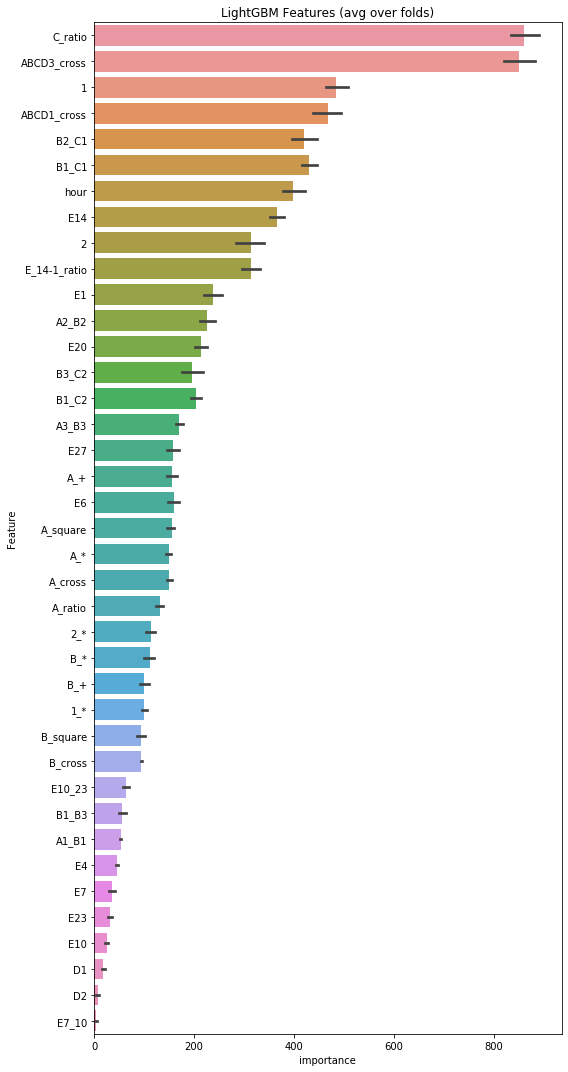

In [53]:
train, test = read_data()
train, test = structural_feature(train, test)
f_num = len(train.columns) - 1
del_feature = ['ID', 'label']
num_round = 1000
features = [i for i in train.columns if i not in del_feature]

train_x = train[features]
train_y = train['label'].values
test = test[features]
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 2019,
}

folds = KFold(n_splits=5, shuffle=True, random_state=2019)
prob_oof = np.zeros((train_x.shape[0], ))
test_pred_prob = np.zeros((test.shape[0], ))

liso=[]
## train and predict
feature_importance_df = pd.DataFrame()
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train)):
    print("fold {}".format(fold_ + 1))
    trn_data = xgb.DMatrix(train_x.iloc[trn_idx], label=train_y[trn_idx])
    val_data = xgb.DMatrix(train_x.iloc[val_idx], label=train_y[val_idx])

    watchlist = [(trn_data, 'train'), (val_data, 'valid')]
    clf = xgb.train(params, trn_data, num_round, watchlist, verbose_eval=200, early_stopping_rounds=200)

    prob_oof[val_idx] = clf.predict(xgb.DMatrix(train_x.iloc[val_idx]), ntree_limit=clf.best_ntree_limit)
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = clf.get_fscore().keys()
    fold_importance_df["importance"] = clf.get_fscore().values()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    aaap=roc_auc_score(train_y[val_idx], prob_oof[val_idx])
    liso.append(aaap)
    test_pred_prob += clf.predict(xgb.DMatrix(test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
print('auc:{}'.format(averagenum(liso)))
threshold = 0.5
for pred in test_pred_prob:
    result = 1 if pred > threshold else 0

## plot feature importance
cols = (feature_importance_df[["Feature", "importance"]].groupby("Feature").mean().sort_values(by="importance", ascending=False).index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)].sort_values(by='importance',ascending=False)
plt.figure(figsize=(8, 15))
sns.barplot(y="Feature",
            x="importance",
            data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()


In [31]:
D1*D2,E12,E21,E19,E15,E8,E3,D2,E11,D1/D2,D1-D2,E24,E17,D1,E10,E5,E29
best_features.sort_values(by="importance", ascending=False)auc:0.714657224016998

,Feature,importance,fold
3,C_ratio,2739,2
3,ABCD3_cross,2738,5
10,C_ratio,2725,5
4,C_ratio,2669,1
7,ABCD3_cross,2586,2
...,...,...,...
57,E25,1,4
58,E18,1,4
58,E16,1,2
57,E18,1,2


In [44]:
def BayesianSearch(clf, params):
    """贝叶斯优化器"""
    # 迭代次数
    num_iter = 25
    init_points = 5
    # 创建一个贝叶斯优化对象，输入为自定义的模型评估函数与超参数的范围
    bayes = BayesianOptimization(clf, params)
    # 开始优化
    bayes.maximize(init_points=init_points, n_iter=num_iter)
    # 输出结果
    params = bayes.res['max']
    print(params['max_params'])
    
    return params


def GBM_evaluate(min_child_samples, min_child_weight, colsample_bytree, max_depth, subsample, reg_alpha, reg_lambda):
    """自定义的模型评估函数"""

    # 模型固定的超参数
    param = {
        'objective': 'regression',
        'n_estimators': 275,
        'metric': 'rmse',
        'random_state': 2018}

    # 贝叶斯优化器生成的超参数
    param['min_child_weight'] = int(min_child_weight)
    param['colsample_bytree'] = float(colsample_bytree),
    param['max_depth'] = int(max_depth),
    param['subsample'] = float(subsample),
    param['reg_lambda'] = float(reg_lambda),
    param['reg_alpha'] = float(reg_alpha),
    param['min_child_samples'] = int(min_child_samples)

    # 5-flod 交叉检验，注意BayesianOptimization会向最大评估值的方向优化，因此对于回归任务需要取负数。
    # 这里的评估函数为neg_mean_squared_error，即负的MSE。
    val = cross_val_score(lgb.LGBMRegressor(**param),
        train_X, train_y ,scoring='neg_mean_squared_error', cv=5).mean()

    return val

In [151]:
b2 = pd.DataFrame(aaaa,columns=['label'])

In [152]:
train, test = read_data()
train, test = structural_feature(train, test)
b2['ID']=test['ID']

In [153]:
mid = b2['ID']
b2.drop(labels=['ID'], axis=1,inplace = True)
b2.insert(0, 'ID', mid)

In [154]:
b2.to_csv('test_6.csv',index=False,encoding='utf-8')